In [29]:
import matplotlib as mpl
from cycler import cycler
t=mpl.rcParams['axes.prop_cycle']
mpl.rcParams['axes.prop_cycle']=cycler(color=t.by_key().values()[0][1:]) 

In [112]:
mpl.rcParams['figure.figsize']=(7,3)

In [1]:
from utils import *
import utils
utils.init_dev(utils.get_dev())
utils.allow_growth()

%load_ext autoreload
# %reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%pwd

from metadata import * 
len(imagenet10k)
len(imagenet1k)

Auto select gpu
 ID  GPU  MEM
--------------
  0  60%  66%
  1  99%  69%
  2   0%  35%
  3  99%  69%
  4  99%  69%
  5  99%  69%
  6   0%   1%
  7   0%   1%
available [6]


Using TensorFlow backend.


1000

In [16]:
target_depth = tree.max_depth //2 
target_depth = 8 //2 
res=[]
for node in nx.dfs_preorder_nodes(tree,'fall11'):
    if (tree.node[node]['depth']<=target_depth and tree.node[node]['nchild']==0):
        res.append(node) 
    if (tree.node[node]['depth']==target_depth):
#         rres=[node_ for node_ in nx.dfs_preorder_nodes(tree,node) if tree.node[node_]['nchild']==0]
#         res.append(rres)
        res.append(node)        

In [17]:
os.chdir(root_path)
os.chdir('./data')
path ='train'
mkdir_p(path)
os.chdir(path)
i=0
for node in res: 
    i+=1
    if tree.node[node]['nchild']==0:
        nodes=[node] 
    else: 
        nodes=[node_ for node_ in nx.dfs_preorder_nodes(tree,node) if tree.node[node_]['nchild']==0]
    for  node_ in nodes:
        imagepath= get_imagepath(node_).strip('.tar') 
#         mkdir_p(node) 
#         ln(imagepath+'/*',node)
print i
os.chdir(root_path) 

mkdir -p  train
14084


In [83]:
tree=ori_tree
tree2=tree=slim_tree(tree,'imagenet1k')

In [47]:
def find_child(tree_,node):
    res=[]
    for node in nx.dfs_preorder_nodes(tree_,node):
        imagepath=get_imagepath(node).strip('.tar')
        if osp.exists(imagepath) and tree_.node[node]['nchild'] == 0:
            res.append(node)
    return res 

In [86]:
@chdir_to_root
def nimg_per_class(tree_):
    all_nimg = []
    for node in nx.dfs_preorder_nodes(tree_, 'fall11'):
        imagepath = get_imagepath(node).strip('.tar')
        if osp.exists(imagepath) and tree_.node[node]['nchild'] == 0:
            nimg = len(os.listdir(imagepath))
            all_nimg.append(nimg)
            if nimg == 0:
                print node
                rm(imagepath)
        elif tree_.node[node]['nchild'] >0 and node in imagenet1k:
            nimg_=0
            for node_ in find_child(tree_,node):
                imagepath=get_imagepath(node_).strip('.tar') 
                nimg_+=len(os.listdir(imagepath)) 
            if nimg_>2000:
                print node
            all_nimg.append(nimg_) 
                
    return np.sort(all_nimg)[::-1]


In [ ]:
nimgs=[]
for node in imagenet10k:
    imagepath = get_imagepath(node).strip('.tar')
    if osp.exists(imagepath):
        nimgs.append(len(os.listdir(imagepath))) 
    else:
        nimg=0
        for node_ in find_child(ori_tree,node ): 
            imagepath=get_imagepath(node_).strip('.tar')
            nimg+=len(os.listdir(imagepath)) 
        if nimg ==0:
            print node_
        nimgs.append(nimg) 

In [93]:
nimgs = np.sort(nimgs)[::-1]

In [122]:
sum(nimgs),sum(nimgs)/len(nimgs),len(nimgs[nimgs==0])

(1431431, 1431, 16)

In [103]:
len(nimgs)

1000

(0, 8000)

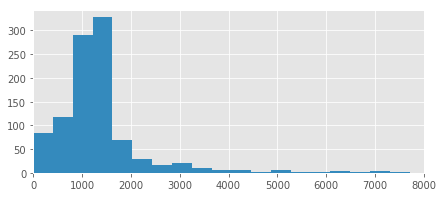

In [120]:
_=plt.hist(nimgs,bins=100)
plt.xlim([0,8000])

<Container object of 3 artists>

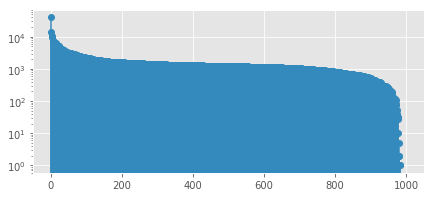

In [113]:
plt.stem(nimgs[:])
plt.yscale('log')

In [108]:
len(nimgs),max(nimgs),min(nimgs),nimgs.mean()

(1000, 40579, 0, 1431.431)

<Container object of 3 artists>

(272, 3047, 669, 812895)

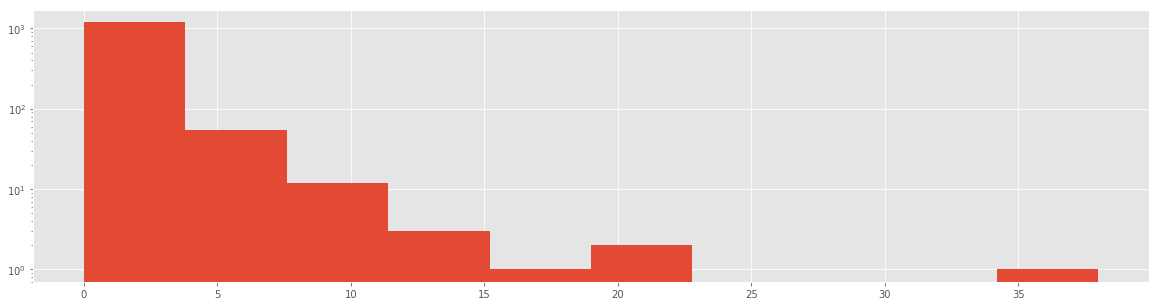

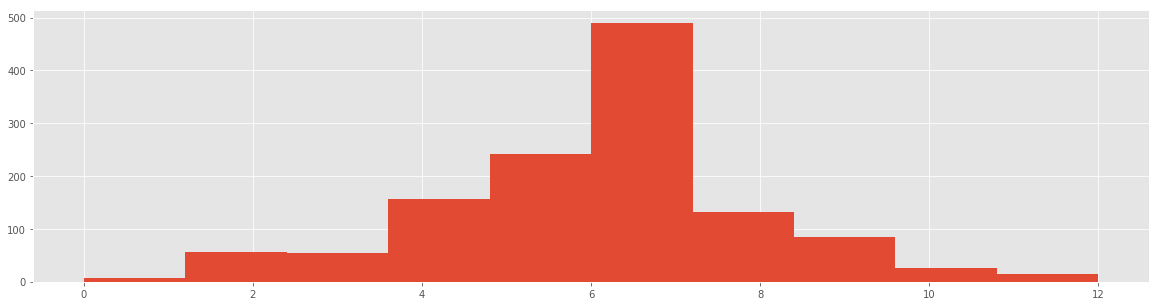

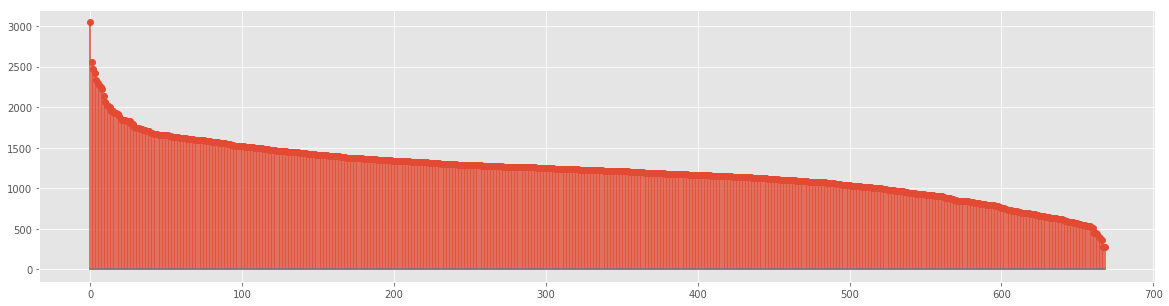

In [7]:
tree2=slim_tree(tree,condition='imagenet1k')
_=plt.figure(figsize=(20,5))
_=plt.hist(tree2.all_nchild)
plt.yscale('log')
_=plt.figure(figsize=(20,5))
_=plt.hist(tree2.all_depth)
nimgs=nimg_per_class(tree2)
plt.figure(figsize=(20,5))
plt.stem(nimgs)
min(nimgs),max(nimgs),len(nimgs),sum(nimgs)

/home/wangxinglu/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<Container object of 3 artists>

(1, 3047, 7450, 6163599)

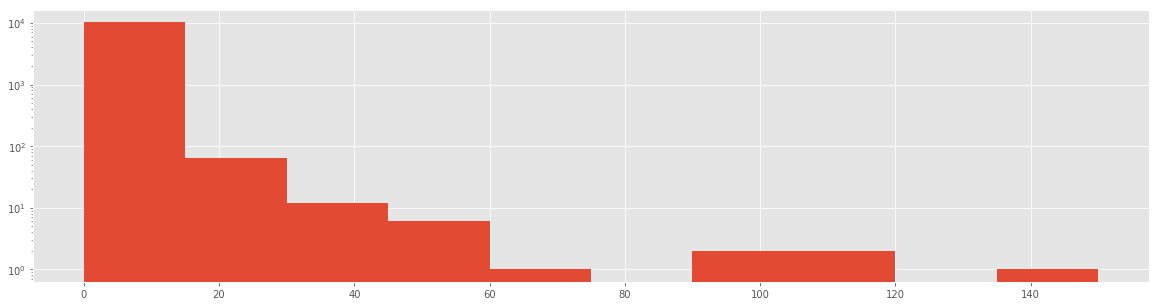

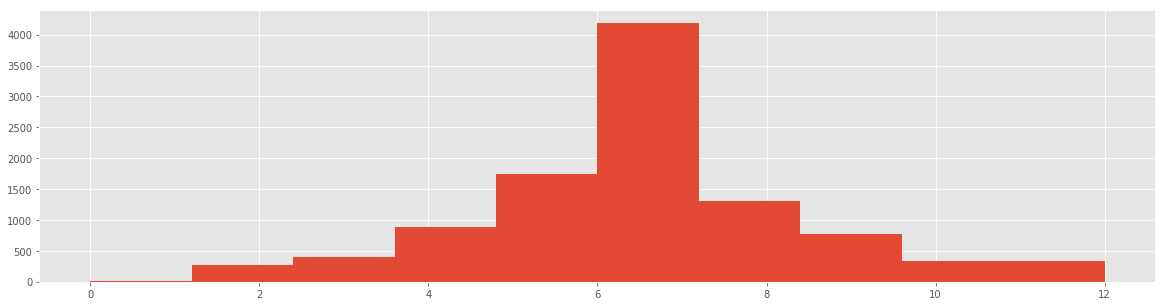

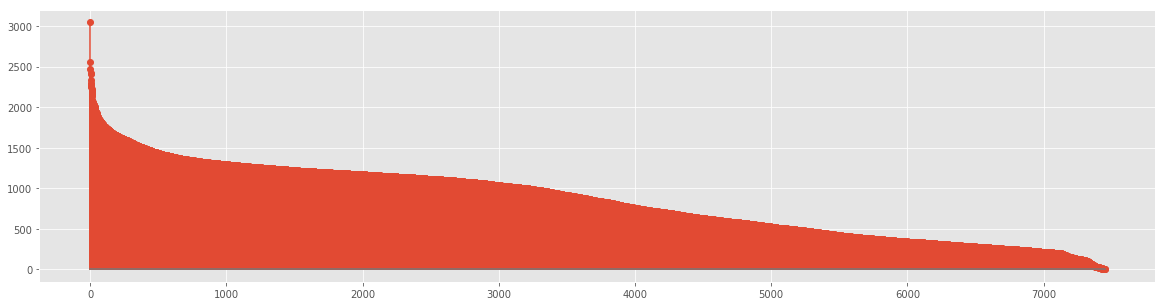

In [6]:
tree2=slim_tree(tree,condition='imagenet10k')
_=plt.figure(figsize=(20,5))
_=plt.hist(tree2.all_nchild)
plt.yscale('log')
_=plt.figure(figsize=(20,5))
_=plt.hist(tree2.all_depth)
nimgs=nimg_per_class(tree2)
plt.figure(figsize=(20,5))
plt.stem(nimgs)
min(nimgs),max(nimgs),len(nimgs),sum(nimgs)